In [1]:
import requests
import pandas as pd
import numpy as np

#https://towardsdatascience.com/fantasy-premier-league-value-analysis-python-tutorial-using-the-fpl-api-8031edfe9910

In [2]:
url = 'https://fantasy.premierleague.com/api/bootstrap-static/'

In [3]:
r = requests.get(url)

In [4]:
json = r.json()

In [5]:
json.keys()

dict_keys(['events', 'game_settings', 'phases', 'teams', 'total_players', 'elements', 'element_stats', 'element_types'])

In [6]:
elements_df = pd.DataFrame(json['elements'])
elements_types_df = pd.DataFrame(json['element_types'])
teams_df = pd.DataFrame(json['teams'])

In [48]:
elements_df.head()

,chance_of_playing_next_round,chance_of_playing_this_round,code,cost_change_event,cost_change_event_fall,cost_change_start,cost_change_start_fall,dreamteam_count,element_type,ep_next,...,now_cost_rank,now_cost_rank_type,form_rank,form_rank_type,points_per_game_rank,points_per_game_rank_type,selected_rank,selected_rank_type,starts_per_90,clean_sheets_per_90
0,100.0,100.0,58822,0,0,-3,3,0,2,0.5,...,556,157,424,163,391,145,399,148,0.00000,0.00000
1,NaN,NaN,84450,0,0,1,-1,1,3,4.0,...,174,100,98,43,41,18,87,27,1.06984,0.40119
2,100.0,100.0,153256,0,0,-3,3,1,3,1.5,...,563,293,193,95,362,157,188,57,0.81081,0.00000
3,NaN,NaN,156074,0,0,-3,3,0,2,1.0,...,564,163,267,89,395,149,419,157,0.00000,0.00000
4,100.0,100.0,167199,0,0,-2,2,0,3,2.0,...,262,158,168,78,100,46,242,80,1.04278,0.56150


In [47]:
elements_df.columns

Index(['chance_of_playing_next_round', 'chance_of_playing_this_round', 'code',
       'cost_change_event', 'cost_change_event_fall', 'cost_change_start',
       'cost_change_start_fall', 'dreamteam_count', 'element_type', 'ep_next',
       'ep_this', 'event_points', 'first_name', 'form', 'id', 'in_dreamteam',
       'news', 'news_added', 'now_cost', 'photo', 'points_per_game',
       'second_name', 'selected_by_percent', 'special', 'squad_number',
       'status', 'team', 'team_code', 'total_points', 'transfers_in',
       'transfers_in_event', 'transfers_out', 'transfers_out_event',
       'value_form', 'value_season', 'web_name', 'minutes', 'goals_scored',
       'assists', 'clean_sheets', 'goals_conceded', 'own_goals',
       'penalties_saved', 'penalties_missed', 'yellow_cards', 'red_cards',
       'saves', 'bonus', 'bps', 'influence', 'creativity', 'threat',
       'ict_index', 'starts', 'expected_goals', 'expected_assists',
       'expected_goal_involvements', 'expected_goals_con

In [9]:
slim_elements_df = elements_df[['second_name','team','element_type','selected_by_percent','now_cost','minutes','transfers_in','value_season','total_points']]

In [10]:
slim_elements_df.head()

,second_name,team,element_type,selected_by_percent,now_cost,minutes,transfers_in,value_season,total_points
0,Alves Soares,1,2,0.1,42,28,6470,0.5,2
1,Xhaka,1,3,3.5,51,1346,781334,13.5,69
2,Elneny,1,3,0.9,42,111,184413,1.4,6
3,Holding,1,2,0.1,42,15,6520,1.2,5
4,Partey,1,3,0.5,48,1122,90280,9.4,45


In [11]:
slim_elements_df['position'] = slim_elements_df.element_type.map(elements_types_df.set_index('id').singular_name)

C:\Users\desig\AppData\Local\Temp\ipykernel_15684\1996727139.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  slim_elements_df['position'] = slim_elements_df.element_type.map(elements_types_df.set_index('id').singular_name)


In [12]:
slim_elements_df.head()

,second_name,team,element_type,selected_by_percent,now_cost,minutes,transfers_in,value_season,total_points,position
0,Alves Soares,1,2,0.1,42,28,6470,0.5,2,Defender
1,Xhaka,1,3,3.5,51,1346,781334,13.5,69,Midfielder
2,Elneny,1,3,0.9,42,111,184413,1.4,6,Midfielder
3,Holding,1,2,0.1,42,15,6520,1.2,5,Defender
4,Partey,1,3,0.5,48,1122,90280,9.4,45,Midfielder


In [13]:
slim_elements_df['team'] = slim_elements_df.team.map(teams_df.set_index('id').name)

C:\Users\desig\AppData\Local\Temp\ipykernel_15684\2815011068.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  slim_elements_df['team'] = slim_elements_df.team.map(teams_df.set_index('id').name)


In [14]:
slim_elements_df['value'] = slim_elements_df.value_season.astype(float)

C:\Users\desig\AppData\Local\Temp\ipykernel_15684\505541812.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  slim_elements_df['value'] = slim_elements_df.value_season.astype(float)


In [15]:
slim_elements_df.sort_values('value',ascending=False).head(10)

,second_name,team,element_type,selected_by_percent,now_cost,minutes,transfers_in,value_season,total_points,position,value
488,Trippier,Newcastle,2,66.9,59,1504,6123560,19.7,116,Defender,19.7
500,Almirón Rejala,Newcastle,3,42.1,59,1420,5071780,17.6,104,Midfielder,17.6
497,Schär,Newcastle,2,11.9,49,1424,2193974,16.1,79,Defender,16.1
100,Raya Martin,Brentford,1,6.8,46,1530,964331,15.9,73,Goalkeeper,15.9
320,Ward,Leicester,1,31.4,41,1530,2094159,15.6,64,Goalkeeper,15.6
5,Ødegaard,Arsenal,3,20.5,65,1252,2887340,15.5,101,Midfielder,15.5
507,Pope,Newcastle,1,21.2,53,1530,2964432,15.5,82,Goalkeeper,15.5
508,Botman,Newcastle,2,4.2,44,1237,575988,15.2,67,Defender,15.2
301,Hoelgebaum Pereira,Fulham,3,24.2,46,1414,2567521,15.0,69,Midfielder,15.0
489,Burn,Newcastle,2,2.0,45,1404,297488,14.7,66,Defender,14.7


In [46]:
slim_elements_df.pivot_table(index='position',values='value',aggfunc=np.mean).reset_index()

,position,value
0,Defender,5.415385
1,Forward,4.586441
2,Goalkeeper,9.364286
3,Midfielder,5.301860


In [45]:
pivot=slim_elements_df.pivot_table(index='position',values='value',aggfunc=np.mean).reset_index()
pivot.sort_values('value',ascending=False)

,position,value
2,Goalkeeper,9.364286
0,Defender,5.415385
3,Midfielder,5.301860
1,Forward,4.586441


In [18]:
slim_elements_df = slim_elements_df.loc[slim_elements_df.value > 0]

In [19]:
pivot = slim_elements_df.pivot_table(index='position',values='value',aggfunc=np.mean).reset_index()

In [20]:
pivot.sort_values('value',ascending=False)

,position,value
2,Goalkeeper,9.364286
0,Defender,5.415385
3,Midfielder,5.301860
1,Forward,4.586441


In [21]:
team_pivot = slim_elements_df.pivot_table(index='team',values='value',aggfunc=np.mean).reset_index()

In [22]:
team_pivot.sort_values('value',ascending=False)

,team,value
14,Newcastle,7.558333
0,Arsenal,7.126087
10,Leicester,6.519048
6,Crystal Palace,6.289474
12,Man City,6.128571
3,Brentford,6.125000
4,Brighton,6.059091
13,Man Utd,6.018182
8,Fulham,5.600000
1,Aston Villa,5.543478


In [23]:
fwd_df = slim_elements_df.loc[slim_elements_df.position == 'Forward']
mid_df = slim_elements_df.loc[slim_elements_df.position == 'Midfielder']
def_df = slim_elements_df.loc[slim_elements_df.position == 'Defender']
goal_df = slim_elements_df.loc[slim_elements_df.position == 'Goalkeeper']

<AxesSubplot:>

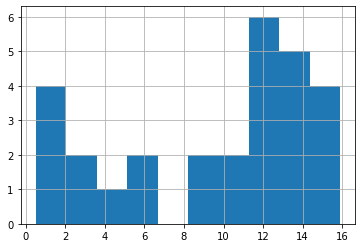

In [24]:
goal_df.value.hist()

In [25]:
goal_df.sort_values('value',ascending=False).head(10)

,second_name,team,element_type,selected_by_percent,now_cost,minutes,transfers_in,value_season,total_points,position,value
100,Raya Martin,Brentford,1,6.8,46,1530,964331,15.9,73,Goalkeeper,15.9
320,Ward,Leicester,1,31.4,41,1530,2094159,15.6,64,Goalkeeper,15.6
507,Pope,Newcastle,1,21.2,53,1530,2964432,15.5,82,Goalkeeper,15.5
534,Henderson,Nott'm Forest,1,9.4,47,1440,1386813,14.7,69,Goalkeeper,14.7
652,Malheiro de Sá,Wolves,1,5.2,50,1530,745203,13.6,68,Goalkeeper,13.6
446,De Gea Quintana,Man Utd,1,8.9,49,1440,823822,13.1,64,Goalkeeper,13.1
13,Ramsdale,Arsenal,1,12.2,49,1440,1122750,12.9,63,Goalkeeper,12.9
203,Guaita,Crystal Palace,1,2.3,45,1440,446024,12.9,58,Goalkeeper,12.9
246,Pickford,Everton,1,5.8,45,1440,589397,12.9,58,Goalkeeper,12.9
386,Ramses Becker,Liverpool,1,15.7,55,1440,1159525,12.7,70,Goalkeeper,12.7


<AxesSubplot:>

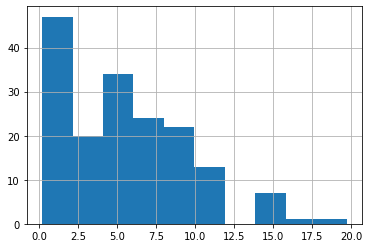

In [26]:
def_df.value.hist()

In [27]:
def_df.sort_values('value',ascending=False).head(10)

,second_name,team,element_type,selected_by_percent,now_cost,minutes,transfers_in,value_season,total_points,position,value
488,Trippier,Newcastle,2,66.9,59,1504,6123560,19.7,116,Defender,19.7
497,Schär,Newcastle,2,11.9,49,1424,2193974,16.1,79,Defender,16.1
508,Botman,Newcastle,2,4.2,44,1237,575988,15.2,67,Defender,15.2
489,Burn,Newcastle,2,2.0,45,1404,297488,14.7,66,Defender,14.7
8,White,Arsenal,2,13.9,47,1299,1743632,14.7,69,Defender,14.7
23,Saliba,Arsenal,2,35.1,53,1425,4685877,14.5,77,Defender,14.5
324,Castagne,Leicester,2,10.2,47,1371,1642853,14.3,67,Defender,14.3
14,dos Santos Magalhães,Arsenal,2,14.6,52,1440,1767749,14.2,74,Defender,14.2
123,Mee,Brentford,2,5.7,46,1388,1083001,13.9,64,Defender,13.9
358,Struijk,Leeds,2,0.9,45,1344,196349,11.6,52,Defender,11.6


In [29]:
slim_elements_df.to_csv('fpl_data.csv')